## Importing libraries 

In [36]:
import pandas as pd
from datetime import datetime
import pyfolio as pf
from dateutil.relativedelta import relativedelta

## Read excel file

In [37]:
df = pd.read_excel('Nifty 100.xlsx', header = 2)
df

,Sr.No.,Accord Code,Company Name,NDP_Date,NDP_Open,NDP_High,NDP_Low,NDP_Close,NDP_Mcap,NDP_Volume ('000),NDP_Value
0,1,100410.0,ACC Ltd.,2020-04-13,1015.0,1122.1,1001.45,1067.25,20041.595644,3572.087,379.350652
1,2,100410.0,ACC Ltd.,2020-04-09,972.0,1015.0,951.80,999.50,18769.336937,2658.885,262.192117
2,3,100410.0,ACC Ltd.,2020-04-08,1000.0,1029.9,941.25,956.05,17953.401279,2153.627,210.132039
3,4,100410.0,ACC Ltd.,2020-04-07,976.0,1018.8,973.10,1009.95,18965.574627,1579.268,157.367623
4,5,100410.0,ACC Ltd.,2020-04-03,960.0,969.8,936.95,962.60,18076.401936,1221.295,117.137420
...,...,...,...,...,...,...,...,...,...,...,...
31500,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31501,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31502,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31503,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data preprocessing

In [38]:
df = df.dropna(thresh = 5)
df

,Sr.No.,Accord Code,Company Name,NDP_Date,NDP_Open,NDP_High,NDP_Low,NDP_Close,NDP_Mcap,NDP_Volume ('000),NDP_Value
0,1,100410.0,ACC Ltd.,2020-04-13,1015.00,1122.1,1001.45,1067.25,20041.595644,3572.087,379.350652
1,2,100410.0,ACC Ltd.,2020-04-09,972.00,1015.0,951.80,999.50,18769.336937,2658.885,262.192117
2,3,100410.0,ACC Ltd.,2020-04-08,1000.00,1029.9,941.25,956.05,17953.401279,2153.627,210.132039
3,4,100410.0,ACC Ltd.,2020-04-07,976.00,1018.8,973.10,1009.95,18965.574627,1579.268,157.367623
4,5,100410.0,ACC Ltd.,2020-04-03,960.00,969.8,936.95,962.60,18076.401936,1221.295,117.137420
...,...,...,...,...,...,...,...,...,...,...,...
31493,31494,105537.0,Zee Entertainment Enterprises Ltd.,2019-01-07,469.00,469.0,457.50,462.95,44464.796617,3020.561,139.528640
31494,31495,105537.0,Zee Entertainment Enterprises Ltd.,2019-01-04,463.00,468.7,455.60,463.95,44560.843268,2552.610,118.031604
31495,31496,105537.0,Zee Entertainment Enterprises Ltd.,2019-01-03,472.50,472.9,457.65,461.45,44320.726642,3488.230,161.961978
31496,31497,105537.0,Zee Entertainment Enterprises Ltd.,2019-01-02,476.05,480.0,462.25,470.25,45165.937162,2687.773,126.970943


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31498 entries, 0 to 31497
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr.No.             31498 non-null  object        
 1   Accord Code        31498 non-null  float64       
 2   Company Name       31498 non-null  object        
 3   NDP_Date           31498 non-null  datetime64[ns]
 4   NDP_Open           31498 non-null  float64       
 5   NDP_High           31498 non-null  float64       
 6   NDP_Low            31498 non-null  float64       
 7   NDP_Close          31498 non-null  float64       
 8   NDP_Mcap           31498 non-null  float64       
 9   NDP_Volume ('000)  31498 non-null  float64       
 10  NDP_Value          31498 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 2.9+ MB


In [40]:
min_date = df['NDP_Date'].min()
max_date = df['NDP_Date'].max()
df = df.sort_values(['Company Name','NDP_Date'])
df = df.drop(columns='Sr.No.')
df.reset_index(inplace=True)
df = df.drop(columns = 'index')
df.rename({'Accord Code':'Accord_Code', 'Company Name':'Company_Name'}, axis = 1, inplace=True)
df

,Accord_Code,Company_Name,NDP_Date,NDP_Open,NDP_High,NDP_Low,NDP_Close,NDP_Mcap,NDP_Volume ('000),NDP_Value
0,100410.0,ACC Ltd.,2019-01-01,1516.90,1516.90,1475.00,1488.80,27957.767715,840.791,125.227599
1,100410.0,ACC Ltd.,2019-01-02,1487.85,1501.95,1477.55,1483.95,27866.690893,669.181,99.722554
2,100410.0,ACC Ltd.,2019-01-03,1483.95,1492.70,1445.40,1452.25,27271.405269,451.970,66.470173
3,100410.0,ACC Ltd.,2019-01-04,1458.00,1473.00,1437.55,1469.10,27587.826807,532.734,77.624928
4,100410.0,ACC Ltd.,2019-01-07,1482.00,1499.75,1471.80,1477.95,27754.018535,438.357,65.127213
...,...,...,...,...,...,...,...,...,...,...
31493,105537.0,Zee Entertainment Enterprises Ltd.,2020-04-03,123.00,125.95,119.05,124.35,11943.609027,7888.049,96.861732
31494,105537.0,Zee Entertainment Enterprises Ltd.,2020-04-07,129.00,143.00,126.65,140.90,13533.208781,11487.045,154.235404
31495,105537.0,Zee Entertainment Enterprises Ltd.,2020-04-08,138.00,148.15,135.25,143.15,13749.317509,10046.602,143.732741
31496,105537.0,Zee Entertainment Enterprises Ltd.,2020-04-09,145.10,151.30,145.00,149.85,14392.841276,8715.706,129.973199


## Calculation of 6 month return

In [6]:
def return_calc(stock, t):
    stock_df = df[df.Company_Name == stock]
    time_6_prior = t - relativedelta(months = 6)
    current = stock_df.loc[stock_df.NDP_Date == t,'NDP_Close'].values[0]
    prev = stock_df.loc[stock_df.NDP_Date == time_6_prior,'NDP_Close'].values[0]
    returns_stock = (current-prev)/prev
    return returns_stock 

In [7]:
all_stocks = df['Company_Name'].unique()

In [8]:
df_returns = pd.DataFrame(columns = ['Stock_name', 'returns'])
df_returns

,Stock_name,returns


## Top 20 stocks with highest returns

In [9]:
def top20_6months(t):
    all_stocks = df['Company_Name'].unique()
    df_returns = pd.DataFrame(columns = ['Stock_name', 'returns'])
    
    for st in all_stocks:
        r = return_calc(st,t)
        df_returns = df_returns.append({'Stock_name':st,'returns':r}, ignore_index = True)
        
    return list(df_returns.sort_values('returns', ascending = False).head(20)['Stock_name'])

In [10]:
#to store the returns
return_df = pd.DataFrame({'Dates':df['NDP_Date'].unique(), 'Returns':0})
return_df


,Dates,Returns
0,2019-01-01,0
1,2019-01-02,0
2,2019-01-03,0
3,2019-01-04,0
4,2019-01-07,0
...,...,...
310,2020-04-03,0
311,2020-04-07,0
312,2020-04-08,0
313,2020-04-09,0


## Backtesting

In [11]:
def backtest(t_buy, cash_current):
    org_cash = cash_current
    cash = cash_current
    No_of_stock = [0]*20

    stock_list = top20_6months(t_buy)
    t_sell = relativedelta(months = 1) + t_buy

    buy_price_list = [None]*20
    sell_price_list = [None]*20
    for i in range(0,len(df)):
        if(df.Company_Name[i] in stock_list and df.NDP_Date[i] == t_buy):
            index = stock_list.index(df.Company_Name[i])
            buy_price_list[index] = df.NDP_Close[i]
            No_of_stock[index] = int((org_cash/20)/df.NDP_Close[i])
            cash = cash - No_of_stock[index]*df.NDP_Close[i]
        if(df.Company_Name[i] in stock_list and df.NDP_Date[i] == t_sell):
            index = stock_list.index(df.Company_Name[i])
            sell_price_list[index] = df.NDP_Close[i]
            cash = cash + No_of_stock[index]*df.NDP_Close[i]
            No_of_stock[index] = 0
    returns = (cash - org_cash)/org_cash
    return_df.loc[return_df['Dates'] == t_sell,'Returns'] = returns
    return cash



## Calculating cash with exception handling

In [12]:
t_start = datetime(2019,7,1)
org_cash = 1000000
cash_current = 1000000

for j in range(0,9):
    try:
        t_current =  t_start + relativedelta(months = j)
        cash_current = backtest(t_current, cash_current)
        print(cash_current)
    except:
        print("Didn't work for ", 7+j)
    
cash_current

933358.5666666665
20170.466666666456
Didn't work for  9
20573.06666666645
Didn't work for  11
Didn't work for  12
20271.366666666443
11296.616666666443
Didn't work for  15


11296.616666666443

## Generating tearsheet using Pyfolio

C:\Users\Ravi\anaconda3\lib\site-packages\empyrical\stats.py:1527: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


Start date,2019-01-01
End date,2020-04-13
Total months,15
,Backtest
Annual return,-5.0%
Cumulative returns,-6.2%
Annual volatility,6.4%
Sharpe ratio,-0.77
Calmar ratio,-0.75
Stability,0.67
Max drawdown,-6.7%


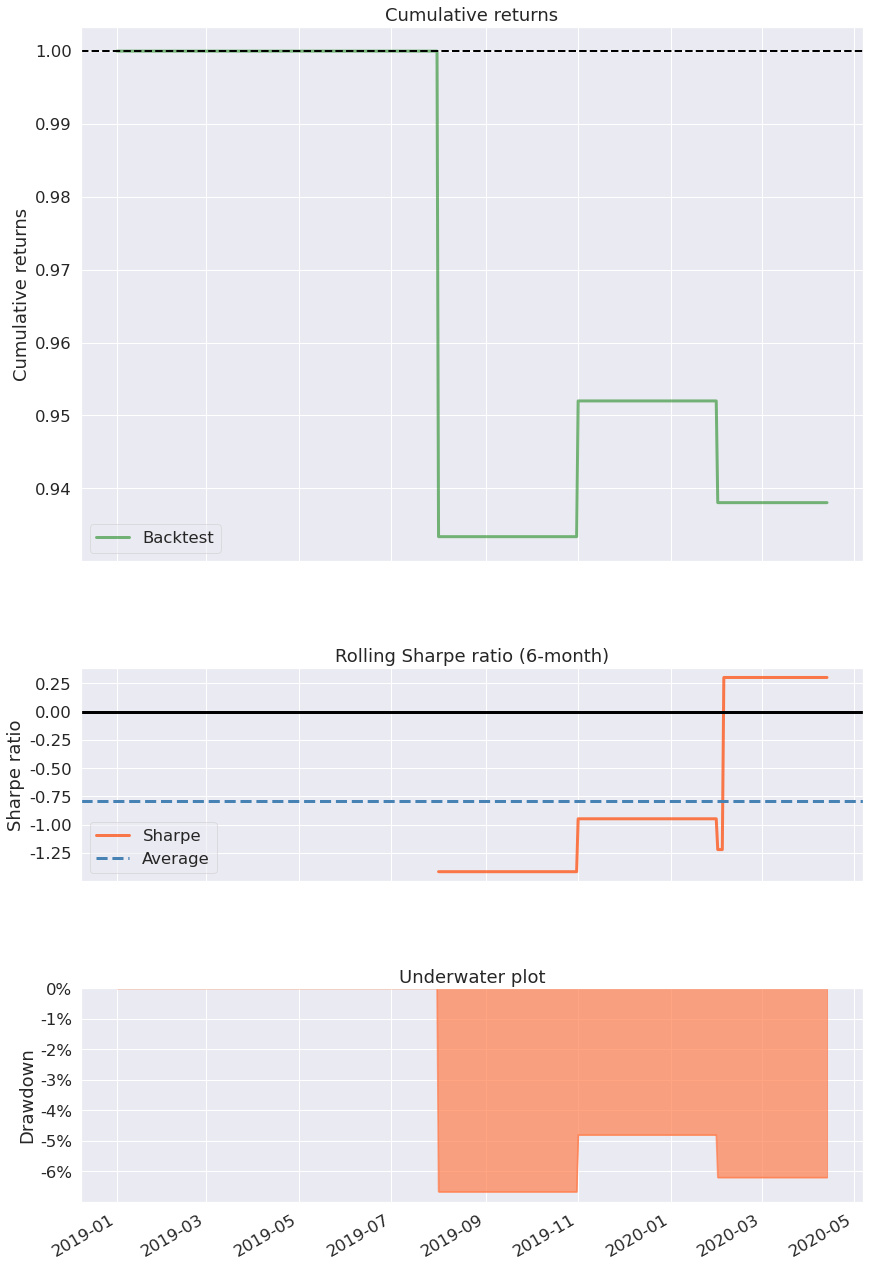

In [13]:
return_df.set_index('Dates', inplace = True)
pf.create_simple_tear_sheet(return_df['Returns'])